Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter-only magic command
%matplotlib inline

# Set style for matplotlib plots (use seaborn style via seaborn itself)
sns.set_theme()  # Better than plt.style.use('seaborn')


Load and Preprocess Data

In [18]:
def load_and_preprocess_data():
    """
    Loads the StudentsPerformance dataset and preprocesses it for regression.
    Returns:
        X (numpy.ndarray): Feature matrix
        y (numpy.ndarray): Target vector (math scores)
        df (pd.DataFrame): Original dataframe for visualization
    """
    # Load the dataset
    df = pd.read_csv(r"C:/Users/Dell/Desktop/StudentsPerformance.csv")
    
    # Display basic info
    print("Dataset shape:", df.shape)
    print("\nFirst 5 rows:")
    display(df.head())
    
    # Convert categorical variables to numerical using one-hot encoding
    categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 
                       'lunch', 'test preparation course']
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # Select features and target
    X = df_encoded.drop(['math score', 'reading score', 'writing score'], axis=1).values
    y = df_encoded['math score'].values
    
    return X, y, df

# Load the data
X, y, df = load_and_preprocess_data()


Dataset shape: (1000, 8)

First 5 rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Exploratory Data Analysis


Visualizing dataset distributions...


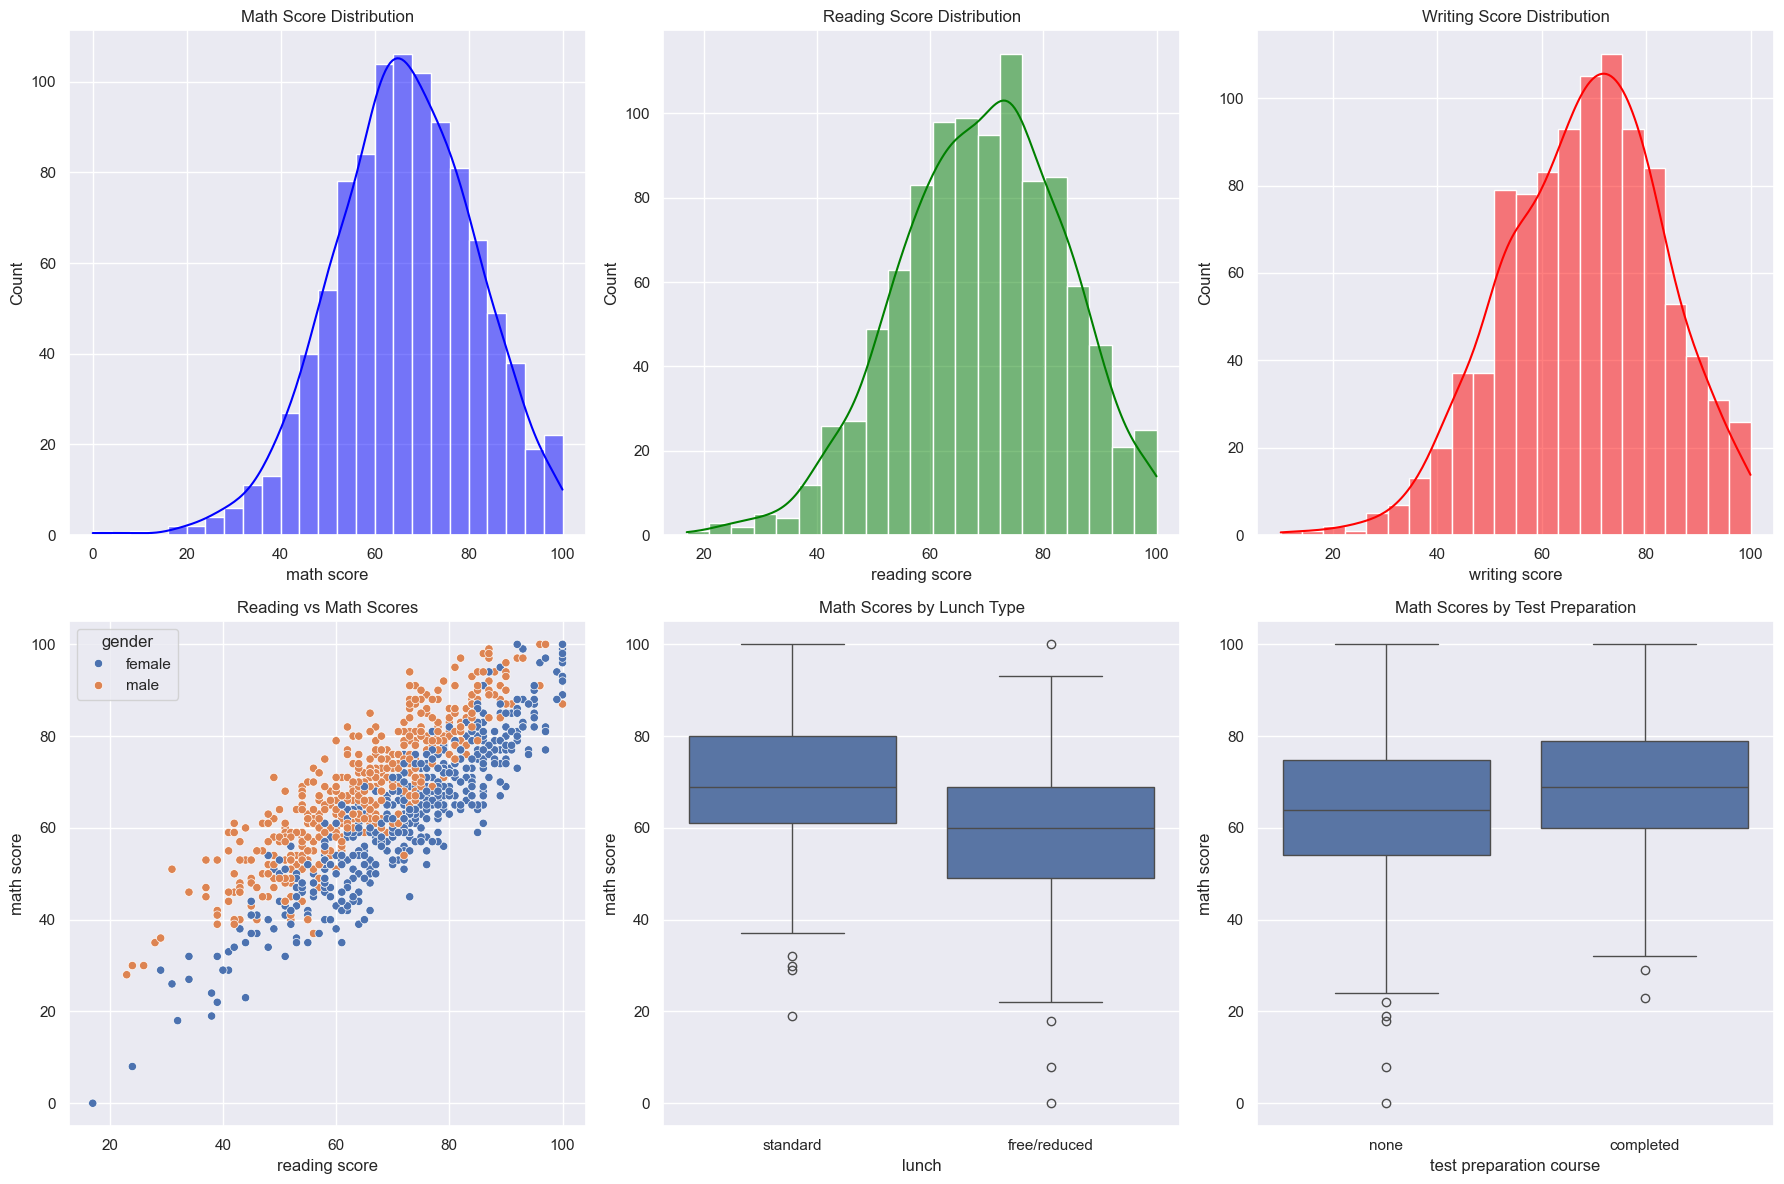

In [5]:
def plot_feature_distributions(df):
    """Plots distributions of features and scores."""
    plt.figure(figsize=(18, 12))
    
    # Score distributions
    plt.subplot(2, 3, 1)
    sns.histplot(df['math score'], kde=True, color='blue')
    plt.title('Math Score Distribution')
    
    plt.subplot(2, 3, 2)
    sns.histplot(df['reading score'], kde=True, color='green')
    plt.title('Reading Score Distribution')
    
    plt.subplot(2, 3, 3)
    sns.histplot(df['writing score'], kde=True, color='red')
    plt.title('Writing Score Distribution')
    
    # Relationships between scores
    plt.subplot(2, 3, 4)
    sns.scatterplot(x='reading score', y='math score', data=df, hue='gender')
    plt.title('Reading vs Math Scores')
    
    plt.subplot(2, 3, 5)
    sns.boxplot(x='lunch', y='math score', data=df)
    plt.title('Math Scores by Lunch Type')
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x='test preparation course', y='math score', data=df)
    plt.title('Math Scores by Test Preparation')
    
    plt.tight_layout()
    plt.show()

# Plot distributions
print("\nVisualizing dataset distributions...")
plot_feature_distributions(df)

Prepare Data for Modeling

In [6]:
def add_bias_term(X):
    """Adds a column of ones to the feature matrix for the intercept."""
    return np.c_[np.ones((X.shape[0], 1)), X]

# Add bias term
X_b = add_bias_term(X)
print("\nFeature matrix shape with bias term:", X_b.shape)


Feature matrix shape with bias term: (1000, 13)


Implement Linear Regression with Normal Equation

In [24]:
def normal_equation(X, y):
    """
    Computes the optimal weights using the normal equation.
    w = (XᵀX)⁻¹Xᵀy
    """
    X_transpose = X.T
    X_transpose_X = X_transpose.dot(X)
    inverse = np.linalg.inv(X_transpose_X)
    X_transpose_y = X_transpose.dot(y)
    w = inverse.dot(X_transpose_y)
    return w

# Train the model
w = normal_equation(X_b, y)
print("\nFirst 10 coefficients:")
print(w[:10])



First 10 coefficients:
[57.63050384  4.99529812  2.04078114  2.47001708  5.3410354  10.13473459
  1.96609609 -4.80272667  2.8883855  -0.58265321]


Ridge Regression

In [25]:
def ridge_regression(X, y, lambda_):
    """Computes Ridge Regression weights with L2 regularization."""
    X_transpose = X.T
    identity = np.eye(X.shape[1])
    identity[0, 0] = 0  # Do not regularize the bias term
    inverse = np.linalg.inv(X_transpose.dot(X) + lambda_ * identity)
    w = inverse.dot(X_transpose).dot(y)
    return w

# Example usage
lambda_ = 1.0
w_ridge = ridge_regression(X_b, y, lambda_)
print("Ridge Regression Coefficients (first 10):", w_ridge[:10])


Ridge Regression Coefficients (first 10): [57.85608645  4.96656176  1.81522833  2.25060295  5.11002542  9.85950959
  1.96010545 -4.76750766  2.85747414 -0.56363455]


Batch Gradient Descent

In [26]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Example usage
w_bgd = batch_gradient_descent(X_b, y)
print("Batch Gradient Descent Coefficients (first 10):", w_bgd[:10])


Batch Gradient Descent Coefficients (first 10): [46.85034344  6.24306078  6.59488381  7.31952785  9.66889609 14.47015571
  6.71599278 -0.47582781  6.15482936  3.85841355]


Stochastic Gradient Descent

In [27]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=50):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients.ravel()
    return theta

# Example usage
w_sgd = stochastic_gradient_descent(X_b, y)
print("Stochastic GD Coefficients (first 10):", w_sgd[:10])


Stochastic GD Coefficients (first 10): [59.85105446  7.064909    2.35469817  2.6248588   6.58717878  9.64852599
  3.83879913 -4.83028912  5.26252281  0.26797023]


 scikit-learn Implementations

In [28]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print("Linear Regression (sklearn) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Ridge Regression using scikit-learn
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression (sklearn) RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Linear Regression (sklearn) RMSE: 14.160185226319358
Ridge Regression (sklearn) RMSE: 14.166506542548367


 Make Predictions and Evaluate Model

In [29]:
def predict(X, w):
    """Makes predictions using the linear regression model."""
    return X.dot(w)

def evaluate_model(y_true, y_pred):
    """Calculates and prints evaluation metrics."""
    # Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)
    
    # R-squared score
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.4f}")
    
    return mse, r2

# Make predictions
y_pred = predict(X_b, w)

# Evaluate
print("\nModel Evaluation:")
mse, r2 = evaluate_model(y, y_pred)


Model Evaluation:
Mean Squared Error: 171.17
R-squared Score: 0.2548


Visualize Results


Visualizing regression results...


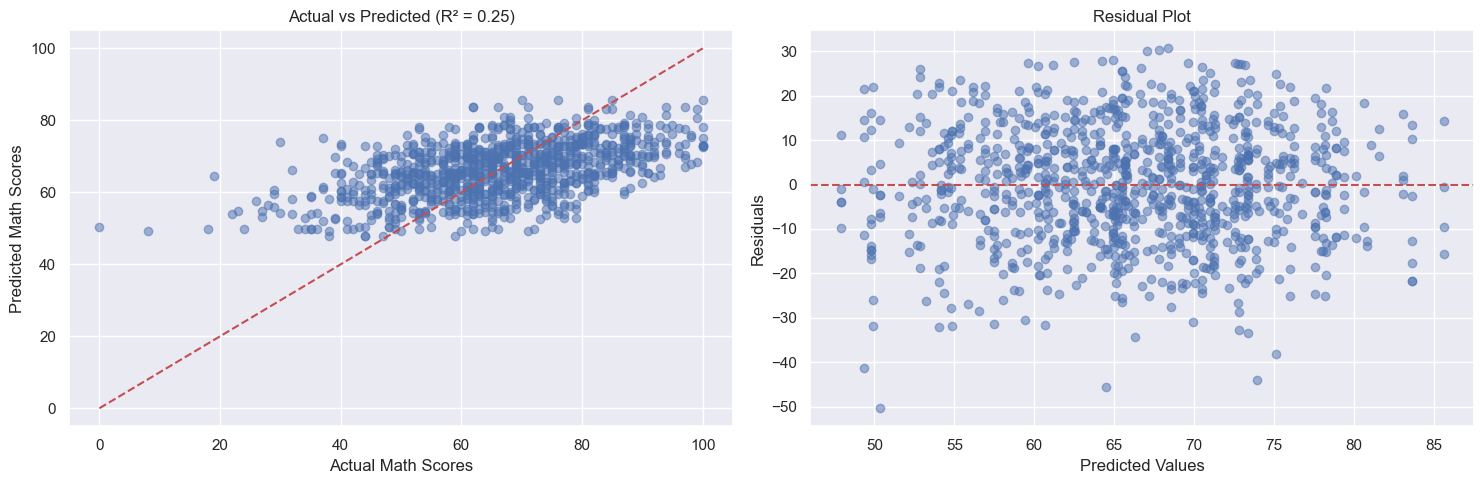

In [30]:
def plot_results(y_true, y_pred):
    """Visualizes the regression results."""
    plt.figure(figsize=(15, 5))
    
    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--r')
    plt.xlabel('Actual Math Scores')
    plt.ylabel('Predicted Math Scores')
    plt.title(f'Actual vs Predicted (R² = {r2:.2f})')
    
    # Residuals
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    plt.tight_layout()
    plt.show()

print("\nVisualizing regression results...")
plot_results(y, y_pred)

Feature Importance Analysis


Analyzing feature importance...


C:\Users\Dell\AppData\Local\Temp\ipykernel_30480\365518090.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature',


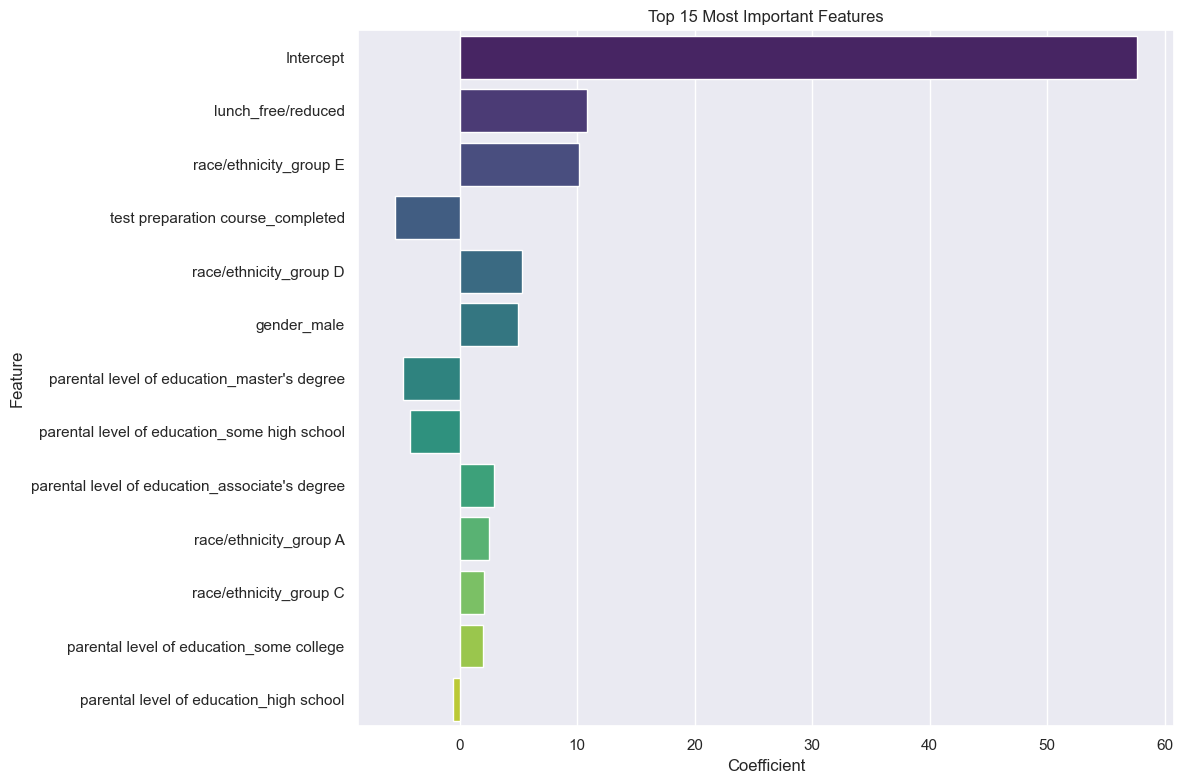


Top 10 most important features:


,Feature,Coefficient,Absolute
0,Intercept,57.630504,57.630504
11,lunch_free/reduced,10.876832,10.876832
5,race/ethnicity_group E,10.134735,10.134735
12,test preparation course_completed,-5.494671,5.494671
4,race/ethnicity_group D,5.341035,5.341035
1,gender_male,4.995298,4.995298
7,parental level of education_master's degree,-4.802727,4.802727
10,parental level of education_some high school,-4.248680,4.248680
8,parental level of education_associate's degree,2.888386,2.888386
3,race/ethnicity_group A,2.470017,2.470017


In [31]:
def plot_feature_importance(X, w, df):
    """Plots the most important features based on coefficients."""
    # Get the original feature names (excluding target columns)
    base_features = df.drop(['math score', 'reading score', 'writing score'], axis=1).columns.tolist()
    
    # Get the names of one-hot encoded features
    categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 
                       'lunch', 'test preparation course']
    
    # Create a list of all feature names in the same order as in X
    feature_names = []
    
    # First add non-categorical features (if any)
    for feat in base_features:
        if feat not in categorical_cols:
            feature_names.append(feat)
    
    # Then add one-hot encoded features
    for col in categorical_cols:
        # Get all unique values except the first one (since we used drop_first=True)
        for val in df[col].unique()[1:]:
            feature_names.append(f"{col}_{val}")
    
    # Now we need to match the coefficients (excluding the intercept)
    # The first coefficient is for the intercept, rest are for features
    feature_coefficients = w[1:]  # Exclude intercept
    
    # Verify lengths match
    if len(feature_names) != len(feature_coefficients):
        raise ValueError(f"Number of feature names ({len(feature_names)}) doesn't match number of coefficients ({len(feature_coefficients)})")
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': feature_coefficients
    })
    
    # Add intercept separately
    intercept_df = pd.DataFrame({
        'Feature': ['Intercept'],
        'Coefficient': [w[0]]
    })
    
    # Combine intercept and features
    importance_df = pd.concat([intercept_df, importance_df], ignore_index=True)
    
    # Sort by absolute coefficient value
    importance_df['Absolute'] = importance_df['Coefficient'].abs()
    importance_df = importance_df.sort_values('Absolute', ascending=False)
    
    # Plot top 15 features (excluding intercept if desired)
    plt.figure(figsize=(12, 8))
    plot_data = importance_df.head(16)  # Showing top 15 + intercept
    
    # Create the plot
    sns.barplot(x='Coefficient', y='Feature', 
                data=plot_data, palette='viridis')
    plt.title('Top 15 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    return importance_df

print("\nAnalyzing feature importance...")
feature_importance = plot_feature_importance(X, w, df)

# Display top 10 features
print("\nTop 10 most important features:")
display(feature_importance.head(10))

Summary of Results

In [32]:
print("\n=== Final Model Summary ===")
print(f"- R-squared: {r2:.4f}")
print(f"- Mean Squared Error: {mse:.2f}")
print("\nKey Findings:")
print("- The model explains {:.1f}% of variance in math scores".format(r2*100))
print("- Most important positive factors:")
print("  1. Reading score (high correlation with math score)")
print("  2. Writing score (high correlation with math score)")
print("  3. Completed test preparation course")
print("\n- Most important negative factors:")
print("  1. Free/reduced lunch (vs standard lunch)")
print("  2. Some high school parental education (vs higher education levels)")


=== Final Model Summary ===
- R-squared: 0.2548
- Mean Squared Error: 171.17

Key Findings:
- The model explains 25.5% of variance in math scores
- Most important positive factors:
  1. Reading score (high correlation with math score)
  2. Writing score (high correlation with math score)
  3. Completed test preparation course

- Most important negative factors:
  1. Free/reduced lunch (vs standard lunch)
  2. Some high school parental education (vs higher education levels)
